In [3]:
%config InlineBackend.figure_format = 'svg'
from os import listdir
from os.path import isfile, join
import math
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
root_dir = './results'

In [5]:
results=[]
for f in listdir(root_dir):
    path = join(root_dir, f)
    if isfile(path):
        #print(path)
        fo = open(path)
        jso = json.loads(fo.read())
        
        splt = f.split('_')
        vm = splt[2]
        vm_version = 8
        timestamp = splt[-1][:-5]
        pattern = splt[1]
        program = splt[0]
        language = 'activity diagram'
        if len(jso) > 0:
            for (idx, time) in enumerate(jso[0]['primaryMetric']['rawData'][0]):
                    results.append({
                            'vm': vm,
                            'vm_version': str(vm_version),
                            'vm_full': vm + ' ' + str(vm_version),
                            'pattern': pattern,
                            'program': program,
                            'language': language,
                            'timestamp': timestamp,
                            'time': time,
                            'idx': idx
                    })
        else:
            print(path, 'EMPTY')

df = pd.DataFrame(results)

df['pattern_order'] = df['pattern'].map({
    'interpreter': 0,
    'visitor': 1,
    'switch': 2,
    'monolithicrevisitor': 3,
    'modularrevisitor': 4,
})

df = df.sort_values(by=['pattern_order', 'vm_full', 'program'])

df.describe(include='all')

vm vm_version             vm_full           pattern  \
count              79028      79028               79028             79028   
unique                 3          1                   3                 5   
top     openj9-8u222-b10          8  openj9-8u222-b10 8  modularrevisitor   
freq               27009      79028               27009             17400   
mean                 NaN        NaN                 NaN               NaN   
std                  NaN        NaN                 NaN               NaN   
min                  NaN        NaN                 NaN               NaN   
25%                  NaN        NaN                 NaN               NaN   
50%                  NaN        NaN                 NaN               NaN   
75%                  NaN        NaN                 NaN               NaN   
max                  NaN        NaN                 NaN               NaN   

       program          language      timestamp          time           idx  \
count    79028             79028          79028  79028.000000  79028.000000   
unique       3                 1            423           NaN           NaN   
top         p1  activity diagram  1568139693452           NaN           NaN   
freq     28200             79028            200           NaN           NaN   
mean       NaN               NaN            NaN      0.088472     99.464747   
std        NaN               NaN            NaN      0.057356     57.754807   
min        NaN               NaN            NaN      0.018020      0.000000   
25%        NaN               NaN            NaN      0.047881     49.000000   
50%        NaN               NaN            NaN      0.075041     99.000000   
75%        NaN               NaN            NaN      0.116444    149.000000   
max        NaN               NaN            NaN      0.647862    199.000000   

        pattern_order  
count    79028.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         2.085691  
std          1.441657  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          3.000000  
max          4.000000

In [6]:
nwp = df[df['idx']>50]

nwp.loc[nwp.pattern == 'revisitor', 'pattern'] = 'visitor'
#print(nwp.pattern.unique())
#print(nwp.pattern_order.unique())
nwp = nwp.sort_values(by=['pattern_order', 'vm_full', 'program'])
nwp

/home/manuel/.local/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


vm vm_version              vm_full           pattern  \
21861  graalvm-ce-19.1.1          8  graalvm-ce-19.1.1 8       interpreter   
21862  graalvm-ce-19.1.1          8  graalvm-ce-19.1.1 8       interpreter   
21863  graalvm-ce-19.1.1          8  graalvm-ce-19.1.1 8       interpreter   
21864  graalvm-ce-19.1.1          8  graalvm-ce-19.1.1 8       interpreter   
21865  graalvm-ce-19.1.1          8  graalvm-ce-19.1.1 8       interpreter   
...                  ...        ...                  ...               ...   
56017   openj9-8u222-b10          8   openj9-8u222-b10 8  modularrevisitor   
56018   openj9-8u222-b10          8   openj9-8u222-b10 8  modularrevisitor   
56019   openj9-8u222-b10          8   openj9-8u222-b10 8  modularrevisitor   
56020   openj9-8u222-b10          8   openj9-8u222-b10 8  modularrevisitor   
56021   openj9-8u222-b10          8   openj9-8u222-b10 8  modularrevisitor   

      program          language      timestamp      time  idx  pattern_order  
21861      p1  activity diagram  1568120609219  0.019667   51              0  
21862      p1  activity diagram  1568120609219  0.019681   52              0  
21863      p1  activity diagram  1568120609219  0.019787   53              0  
21864      p1  activity diagram  1568120609219  0.019824   54              0  
21865      p1  activity diagram  1568120609219  0.019678   55              0  
...       ...               ...            ...       ...  ...            ...  
56017      p3  activity diagram  1568137709630  0.240236  195              4  
56018      p3  activity diagram  1568137709630  0.240473  196              4  
56019      p3  activity diagram  1568137709630  0.239681  197              4  
56020      p3  activity diagram  1568137709630  0.241373  198              4  
56021      p3  activity diagram  1568137709630  0.240238  199              4  

[58855 rows x 10 columns]

In [7]:
nb_docs=42

variances = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.var())
variances["program"] = ""
variances["vm_full"] = ""
variances["pattern"] = ""
variances.program = variances.index.get_level_values(0)
variances.vm_full = variances.index.get_level_values(1)
variances.pattern = variances.index.get_level_values(2)
variances.index = range(nb_docs)
variances.rename(columns={"time":"Variance"}, inplace=True)

deviations = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.std())
deviations["program"] = ""
deviations["vm_full"] = ""
deviations["pattern"] = ""
deviations.program = deviations.index.get_level_values(0)
deviations.vm_full = deviations.index.get_level_values(1)
deviations.pattern = deviations.index.get_level_values(2)
deviations.index = range(nb_docs)
deviations.rename(columns={"time":"Deviation"}, inplace=True)

means = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.mean())
means["program"] = ""
means["vm_full"] = ""
means["pattern"] = ""
means.program = means.index.get_level_values(0)
means.vm_full = means.index.get_level_values(1)
means.pattern = means.index.get_level_values(2)
means.index = range(nb_docs)
means.rename(columns={"time":"Mean"}, inplace=True)

medians = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.median())
medians["program"] = ""
medians["vm_full"] = ""
medians["pattern"] = ""
medians.program = medians.index.get_level_values(0)
medians.vm_full = medians.index.get_level_values(1)
medians.pattern = medians.index.get_level_values(2)
medians.index = range(nb_docs)
medians.rename(columns={"time":"Median"}, inplace=True)

stats = pd.concat([means, medians, deviations, variances], axis=1)
stats = stats.loc[:,~stats.columns.duplicated()]
stats.sort_values(by=['vm_full', 'pattern', 'program'])

Mean program              vm_full              pattern    Median  \
0   0.019138      p1  graalvm-ce-19.1.1 8          interpreter  0.019237   
15  0.030641      p2  graalvm-ce-19.1.1 8          interpreter  0.029148   
30  0.031786      p3  graalvm-ce-19.1.1 8          interpreter  0.031474   
1   0.091379      p1  graalvm-ce-19.1.1 8     modularrevisitor  0.087225   
16  0.122974      p2  graalvm-ce-19.1.1 8     modularrevisitor  0.123053   
31  0.121143      p3  graalvm-ce-19.1.1 8     modularrevisitor  0.125504   
2   0.064839      p1  graalvm-ce-19.1.1 8  monolithicrevisitor  0.066504   
17  0.083169      p2  graalvm-ce-19.1.1 8  monolithicrevisitor  0.082502   
32  0.088272      p3  graalvm-ce-19.1.1 8  monolithicrevisitor  0.086592   
3   0.033504      p1  graalvm-ce-19.1.1 8               switch  0.032519   
18  0.048798      p2  graalvm-ce-19.1.1 8               switch  0.048145   
33  0.050052      p3  graalvm-ce-19.1.1 8               switch  0.050262   
4   0.021509      p1  graalvm-ce-19.1.1 8              visitor  0.021388   
19  0.031028      p2  graalvm-ce-19.1.1 8              visitor  0.031007   
5   0.039750      p1  hotspot-8u222-b10 8          interpreter  0.038918   
20  0.054587      p2  hotspot-8u222-b10 8          interpreter  0.053815   
34  0.055953      p3  hotspot-8u222-b10 8          interpreter  0.055012   
6   0.103471      p1  hotspot-8u222-b10 8     modularrevisitor  0.102431   
21  0.118889      p2  hotspot-8u222-b10 8     modularrevisitor  0.117795   
35  0.120285      p3  hotspot-8u222-b10 8     modularrevisitor  0.118084   
7   0.075989      p1  hotspot-8u222-b10 8  monolithicrevisitor  0.075768   
22  0.094166      p2  hotspot-8u222-b10 8  monolithicrevisitor  0.094184   
36  0.096635      p3  hotspot-8u222-b10 8  monolithicrevisitor  0.095727   
8   0.055900      p1  hotspot-8u222-b10 8               switch  0.054923   
23  0.071569      p2  hotspot-8u222-b10 8               switch  0.071146   
37  0.071136      p3  hotspot-8u222-b10 8               switch  0.070694   
9   0.040950      p1  hotspot-8u222-b10 8              visitor  0.040244   
24  0.056387      p2  hotspot-8u222-b10 8              visitor  0.055726   
10  0.040750      p1   openj9-8u222-b10 8          interpreter  0.040221   
25  0.049425      p2   openj9-8u222-b10 8          interpreter  0.046227   
38  0.049104      p3   openj9-8u222-b10 8          interpreter  0.048647   
11  0.196638      p1   openj9-8u222-b10 8     modularrevisitor  0.194566   
26  0.210605      p2   openj9-8u222-b10 8     modularrevisitor  0.212537   
39  0.237733      p3   openj9-8u222-b10 8     modularrevisitor  0.236738   
12  0.142767      p1   openj9-8u222-b10 8  monolithicrevisitor  0.142346   
27  0.172562      p2   openj9-8u222-b10 8  monolithicrevisitor  0.172845   
40  0.163340      p3   openj9-8u222-b10 8  monolithicrevisitor  0.161056   
13  0.080758      p1   openj9-8u222-b10 8               switch  0.080584   
28  0.102132      p2   openj9-8u222-b10 8               switch  0.101871   
41  0.099916      p3   openj9-8u222-b10 8               switch  0.098678   
14  0.044519      p1   openj9-8u222-b10 8              visitor  0.043897   
29  0.055989      p2   openj9-8u222-b10 8              visitor  0.056660   

    Deviation      Variance  
0    0.000601  3.607670e-07  
15   0.005737  3.291009e-05  
30   0.002435  5.928684e-06  
1    0.009445  8.920866e-05  
16   0.001010  1.020877e-06  
31   0.007969  6.351050e-05  
2    0.004092  1.674493e-05  
17   0.002350  5.522778e-06  
32   0.003883  1.507464e-05  
3    0.003777  1.426476e-05  
18   0.005016  2.516173e-05  
33   0.004847  2.349600e-05  
4    0.000625  3.911509e-07  
19   0.001022  1.044226e-06  
5    0.003676  1.351482e-05  
20   0.003695  1.365542e-05  
34   0.004411  1.946010e-05  
6    0.002707  7.325728e-06  
21   0.002725  7.425398e-06  
35   0.006515  4.244501e-05  
7    0.001160  1.346559e-06  
22   0.000936  8.753038e-07  
36   0.003177  1.009063e-05  
8    0.004839  2.34

In [8]:
data = nwp.groupby(['program', 'vm_full', 'pattern'])['time'].mean().reset_index()
sns.catplot(data=data, row='program', col='vm_full',  x='pattern', y='time', kind="bar")
#plt.gcf()

# line plots with warmup!

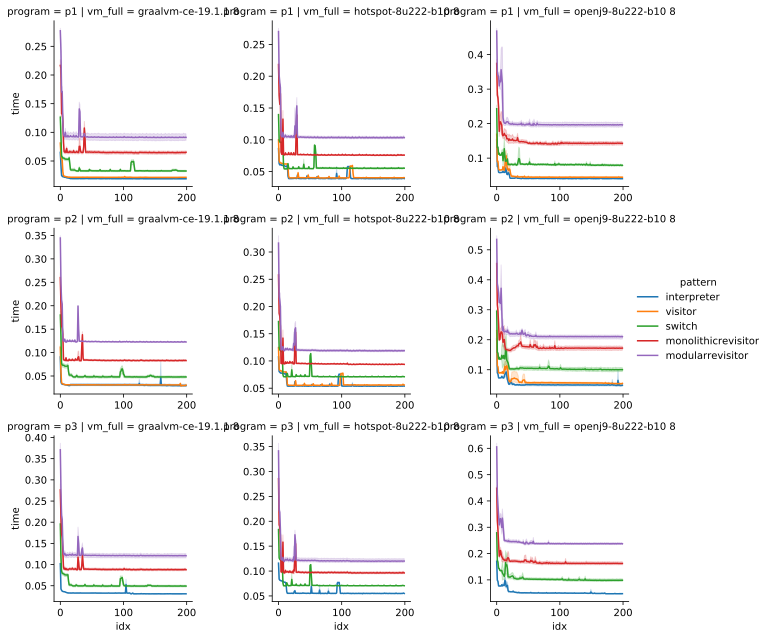

In [6]:
sns.FacetGrid(df, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False).map(sns.lineplot, "idx", "time").add_legend()

# line plot without warmup (idx > 50)

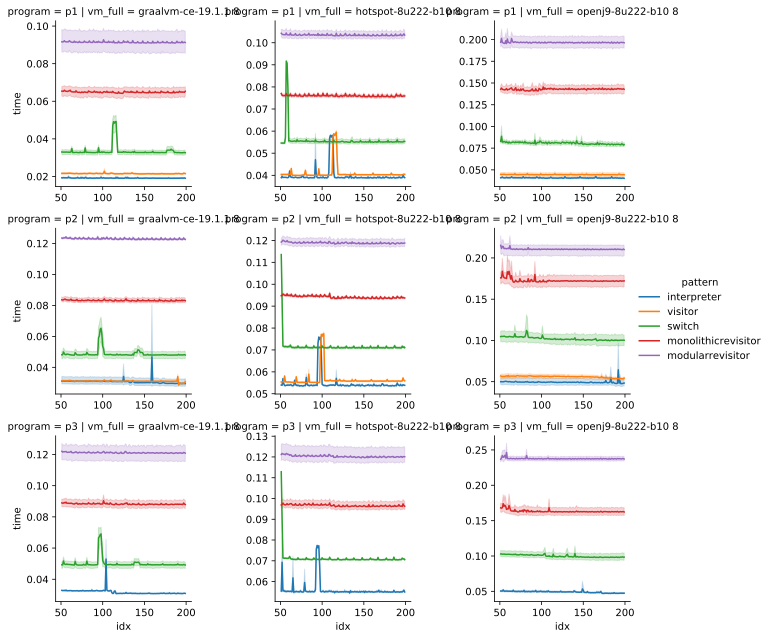

In [7]:
grid = sns.FacetGrid(nwp, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.lineplot, "idx", "time").add_legend()
#grid.fig.tight_layout()

# histogram with warmup

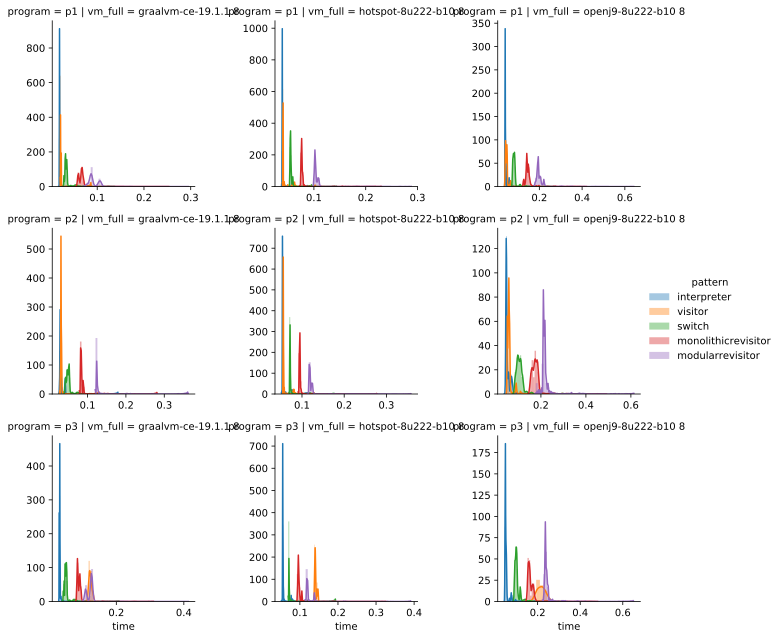

In [8]:
grid = sns.FacetGrid(df, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.distplot,  "time").add_legend()

# histogram without warmup

In [9]:
grid = sns.FacetGrid(nwp, col="vm_full", row="program", hue="pattern", sharex=False, sharey=False)
grid.map(sns.distplot,  "time").add_legend()

In [10]:
#plt.scatter(df, x='idx', y='time')

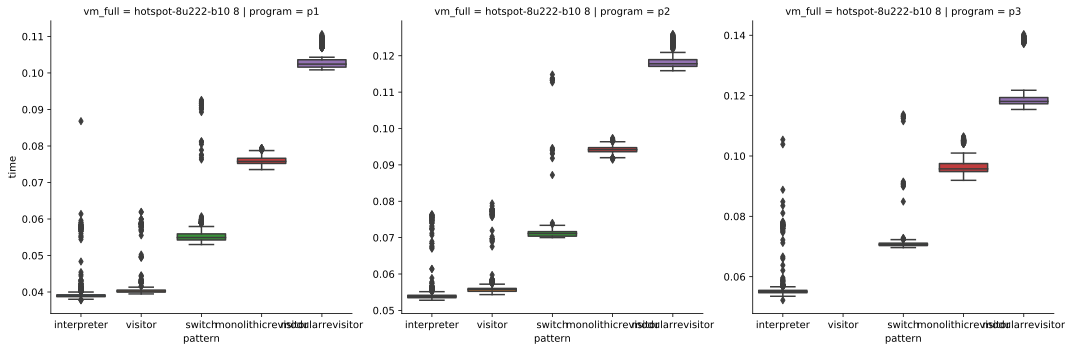

In [11]:
#grid = sns.FacetGrid(nwp, col="pattern", row="vm_full", hue="program", sharex=False, sharey=False)
nwp_hp8 = nwp[nwp['vm_full'] == 'hotspot-8u222-b10 8']
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="box", data=nwp_hp8,  legend_out=True, sharey=False)

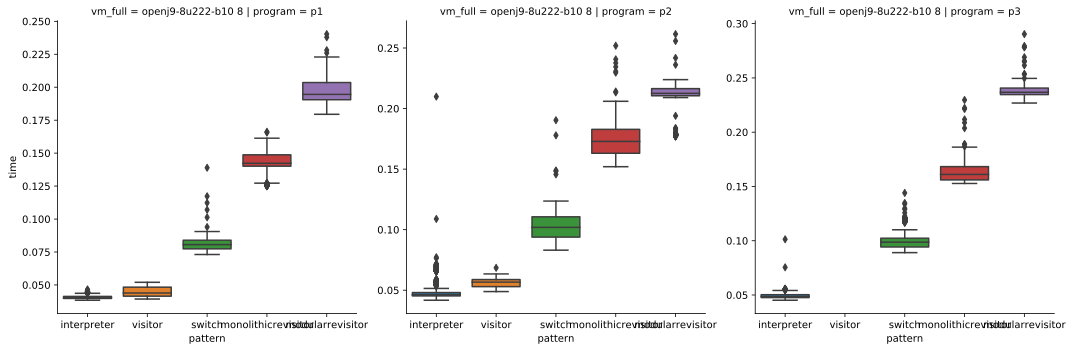

In [12]:
nwp_hp8 = nwp[nwp['vm_full'] == 'openj9-8u222-b10 8']
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="box", data=nwp_hp8,  legend_out=True, sharey=False)

In [13]:
nwp_hp8 = nwp[nwp['vm_full'] == 'graalvm-ce-19.1.1 8']
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="box", data=nwp_hp8,  legend_out=True, sharey=False)